In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from MinorityGameComplex import GameSimulationImitationTermalGraphs

In [3]:
S=2
N=401
Ncop=1
T=20000
numponderas = 100
imprimecada = 10
emes = np.array([5,7,10])

net=1 #SMALL WORLD NETWORK
grado=4
p=0.3

lendyn = 12
leneme = 3
sigma = np.zeros((lendyn, leneme))
gains = np.zeros((lendyn, leneme))
gains_imitators = np.zeros((lendyn, leneme))

dynamic_times = np.logspace(0,4.3,lendyn).astype(int)

for m in range(len(emes)):
    M = emes[m]
    for dynt in range(len(dynamic_times)):
        dynT = dynamic_times[dynt]
        print(' ..............................')
        print('              M = {}     ({} / {})'.format(M, m+1, leneme))
        print('   Dynamic time = {}     ({} / {})'.format(dynT, dynt+1, lendyn))
        print(' ..............................')
        s = 0
        g = 0
        gc = 0
        for pond in range(numponderas):
            A, G, GC = GameSimulationImitationTermalGraphs(S, M, N, Ncop, T, dynT, net, grado, p)
            s += np.var(A) / N
            g += np.mean(G)
            gc += np.mean(GC)
            if (pond + 1) % imprimecada == 0:
                print('        -Ponderacion nº {}/{}'.format(pond + 1, numponderas))
                print('             σ²/N = {}'.format(s / (pond + 1)))
                print('             <g>  = {}'.format(g / (pond + 1)))
                print('             <gi> = {}'.format(gc / (pond + 1)))
        sigma[dynt, m] =  s / numponderas
        gains[dynt, m] = g / numponderas
        gains_imitators[dynt, m] = gc / numponderas
        print('Remembering...')
        print('dynt = ', dynamic_times[:(dynt+1)])
        print('σ²/N = ', sigma[:(dynt+1), m])
        print(' <g> = ', gains[:(dynt+1), m])
        print('<gi> = ', gains_imitators[:(dynt+1), m])

 ..............................
              M = 5     (1 / 3)
   Dynamic time = 1     (1 / 12)
 ..............................
        -Ponderacion nº 10/100
             σ²/N = 3.8676131046034916
             <g>  = -3.8563085
             <gi> = -8.38948
        -Ponderacion nº 20/100
             σ²/N = 3.9043309085536158
             <g>  = -3.8920591125
             <gi> = -8.813094999999999
        -Ponderacion nº 30/100
             σ²/N = 3.8724404657747296
             <g>  = -3.860605425
             <gi> = -8.606496666666665


KeyboardInterrupt: 

In [73]:
for dy in range(len(lendyn)):
    file_name = 'imitation_Sigma,GainImitator,GainALLvsDYNT_' + str(N) +'N_1Ncop_SWORLD_' +str(
                            p) + 'p_' + str(dynamic_times[dy]) + 'dynT_' +  str(
                                T)+'T_'+str(numponderas)+'numponds'
    with open('{}.dat'.format(file_name), 'w') as file:
        for i in range(len(alpha)):
            file.write('{} {} {} {}\n'.format(dynamic_times[i], sigma[dy,i], gains[dy,i], gains_imitators[dy,i]))

In [2]:
S=2
N=401
Ncop=1
T=20000
numponderas = 100
p=0.2

lendyn = 13
leneme = 3

dynTime0 = np.logspace(0,4.3,lendyn).astype(int)
sigma0 = np.zeros((lendyn, lenemes))
gains0 = np.zeros((lendyn, lenemes))
gains_imitators0 = np.zeros((lendyn, lenemes))

for dy in range(len(lendyn)):
    file_name = 'imitation_Sigma,GainImitator,GainALLvsDYNT_' + str(N) +'N_1Ncop_SWORLD_' +str(
                            p) + 'p_' + str(dynTime0[dy]) + 'dynT_' +  str(
                                T)+'T_'+str(numponderas)+'numponds'
    with open('{}.dat'.format(file_name), 'r') as file:
        i = 0
        for line in file:
            value = line.split()
            value[3].split('\n')
            sigma0[dy, i] = float(value[1])
            gains0[dy, i] = float(value[2])
            gains_imitators0[dy, i] = float(value[3])
            i += 1

In [ ]:
#old file names
#file_name = 'MAXIMITATION_Sigma,GainImitator,GainALLvsDyntimes_4M201N_CG,1p_20000T_100numponds'
#file_name = 'MAXIMITATION_Sigma,GainImitator,GainALLvsDyntimes_6M201N_CG,1p_20000T_100numponds'
#file_name = 'MAXIMITATION_Sigma,GainImitator,GainALLvsDyntimes_9M201N_CG,1p_20000T_100numponds'
#file_name = 'MAXIMITATION_Sigma,GainImitator,GainALLvsDyntimes_4M201N_R,1p_20000T_100numponds'
#file_name = 'MAXIMITATION_Sigma,GainImitator,GainALLvsDyntimes_6M201N_R,1p_20000T_100numponds'
#file_name = 'MAXIMITATION_Sigma,GainImitator,GainALLvsDyntimes_9M201N_R,1p_20000T_100numponds'

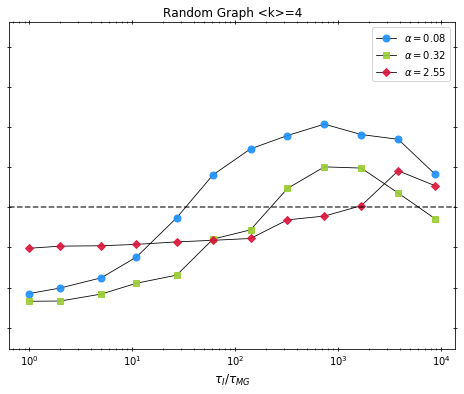

In [16]:
fig, ax = plt.subplots(1, figsize=(8,6))
ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_ylim([0,4.6])
ax.set_xlabel(r'$\alpha$', fontsize='large')
ax.set_ylabel(r'$\sigma^2/N$', fontsize='large')

ax.tick_params(which='both', direction='inout', labelbottom=True, labeltop=False, labelleft=True, labelright=False,
               bottom=True, top=True, left=True, right=True)


cols = ['dodgerblue', 'yellowgreen', 'crimson', 'yellow', 'orange']

for dy in range(len(dynTime0)):
    ax.plot(dynTime0, gains0/gains_imitators0, lw=1, ls = '--', color = 'k', alpha=0.8,
             marker='s', mec = cols[nc], mfc=cols[nc], mew = 1, ms = 7, label=labels[nc])


"""yticks1 = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
ax.set_yticks(yticks1)
ax.set_yticklabels([str(i) for i in yticks1])"""

#ax.axhline(y=1, xmin=0, xmax=1, color='k', alpha=0.7, linestyle='--')

labels = [r'$\alpha = 0.08$', r'$\alpha = 0.32$', r'$\alpha = 2.55$']
ax.legend(loc='center', bbox_to_anchor=[1.1,0.5], label)

#filename = 'imitationCG_SIGMAvsALPHA' + str(
                    #N) +' N_' + 'Ncop_CG_' + str(
                    #dynT) + 'dynT_' + str(T)+'T_'+str(numponderas)+'numponds.png'
#fig.savefig(filename, bbox_inches='tight')